# ***Importing basic libraries and data***

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# ***Data Preprocessing***

In [ ]:
df = df.drop(columns = ['EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours','YearsInCurrentRole'])

In [ ]:
overtime = ['No','Yes']
attrition = ['Yes','No']
gender = ['Female','Male']
business_travel = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
categories = [gender,overtime,business_travel,attrition]
cat_columns = ['Gender','OverTime','BusinessTravel','Attrition']

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('ohe',OneHotEncoder(),['Department','MaritalStatus','EducationField','JobRole']),
        ('ode',OrdinalEncoder(categories = categories),cat_columns)
    ],
    remainder = 'passthrough'
)

In [ ]:
transformed_data = preprocessor.fit_transform(df)

In [ ]:
cols = preprocessor.get_feature_names_out()
df = pd.DataFrame(transformed_data,columns=cols)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,ohe__Department_Human Resources,ohe__Department_Research & Development,ohe__Department_Sales,ohe__MaritalStatus_Divorced,ohe__MaritalStatus_Married,ohe__MaritalStatus_Single,ohe__EducationField_Human Resources,ohe__EducationField_Life Sciences,ohe__EducationField_Marketing,ohe__EducationField_Medical,ohe__EducationField_Other,ohe__EducationField_Technical Degree,ohe__JobRole_Healthcare Representative,ohe__JobRole_Human Resources,ohe__JobRole_Laboratory Technician,ohe__JobRole_Manager,ohe__JobRole_Manufacturing Director,ohe__JobRole_Research Director,ohe__JobRole_Research Scientist,ohe__JobRole_Sales Executive,ohe__JobRole_Sales Representative,ode__Gender,ode__OverTime,ode__BusinessTravel,ode__Attrition,remainder__Age,remainder__DailyRate,remainder__DistanceFromHome,remainder__Education,remainder__EnvironmentSatisfaction,remainder__JobInvolvement,remainder__JobLevel,remainder__JobSatisfaction,remainder__MonthlyIncome,remainder__NumCompaniesWorked,remainder__PercentSalaryHike,remainder__PerformanceRating,remainder__RelationshipSatisfaction,remainder__StockOptionLevel,remainder__TotalWorkingYears,remainder__TrainingTimesLastYear,remainder__WorkLifeBalance,remainder__YearsAtCompany,remainder__YearsSinceLastPromotion,remainder__YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,41.0,1102.0,1.0,2.0,2.0,3.0,2.0,4.0,5993.0,8.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,0.0,5.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,49.0,279.0,8.0,1.0,3.0,2.0,2.0,2.0,5130.0,1.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,1.0,7.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,37.0,1373.0,2.0,2.0,4.0,2.0,1.0,3.0,2090.0,6.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,33.0,1392.0,3.0,4.0,4.0,3.0,1.0,3.0,2909.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,3.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,27.0,591.0,2.0,1.0,1.0,3.0,1.0,2.0,3468.0,9.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
y = df['ode__Attrition']
x = df.drop('ode__Attrition',axis=1)

In [ ]:
y.value_counts()

,count
ode__Attrition,
1.0,1233
0.0,237


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

,count
ode__Attrition,
1.0,978
0.0,978


# ***Decision Tree Classifier Model***

In [ ]:
dtc = DecisionTreeClassifier()

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'n_jobs'

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
path = dtc.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
param_grid = {'ccp_alpha':ccp_alphas,
              'max_depth':[3,5],
              'min_samples_split':[8,10],
              'min_samples_leaf':[5,7]}

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True)

In [ ]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=kf,scoring='recall')

In [ ]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00046864, 0.00048569, 0.00048747, 0.00048801,
       0.00048995, 0.00048995, 0.0004908 , 0.00049945, 0.00050132,
       0.00050243, 0.00050287, 0.00050516, 0.00050819, 0.00051125,
       0.00057284, 0.00062495, 0.00068166, 0.00068166, 0.0006816...
       0.00180532, 0.00188654, 0.00189412, 0.00204499, 0.00252616,
       0.00316911, 0.00321356, 0.00327323, 0.00328585, 0.00350351,
       0.00378329, 0.00442884, 0.00493898, 0.00554267, 0.00581883,
       0.00627848, 0.00636271, 0.00648072, 0.00654397, 0.00874504,
       0.01264989, 0.01973981, 0.02368733, 0.02645898, 0.0360897 ,
       0.11031989]),
                         'max_depth': [3, 5], 'min_samples_leaf': [5, 7],
                         'min_samples_split': [8, 10]},
             scoring='recall')

In [ ]:
print(f'best alpha = {grid_search_cv.best_params_["ccp_alpha"]}')
print(f'best depth = {grid_search_cv.best_params_["max_depth"]}')
print(f'best samples split = {grid_search_cv.best_params_["min_samples_split"]}')
print(f'best samples leaf = {grid_search_cv.best_params_["min_samples_leaf"]}')

best alpha = 0.0031691055684065807
best depth = 5
best samples split = 8
best samples leaf = 5


In [ ]:
grid_search_cv.best_score_

0.8607331639489519

In [ ]:
best_dtc = grid_search_cv.best_estimator_

In [ ]:
feature_imp = pd.DataFrame(best_dtc.feature_importances_,index=x_train.columns,columns=['Importance'])
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)
feature_imp.head()

,Importance
ode__OverTime,0.460198
ohe__MaritalStatus_Single,0.166333
remainder__MonthlyIncome,0.088375
ohe__JobRole_Sales Executive,0.062047
remainder__TotalWorkingYears,0.039761


In [ ]:
fig = plt.figure(figsize=(25,20))

<Figure size 2500x2000 with 0 Axes>

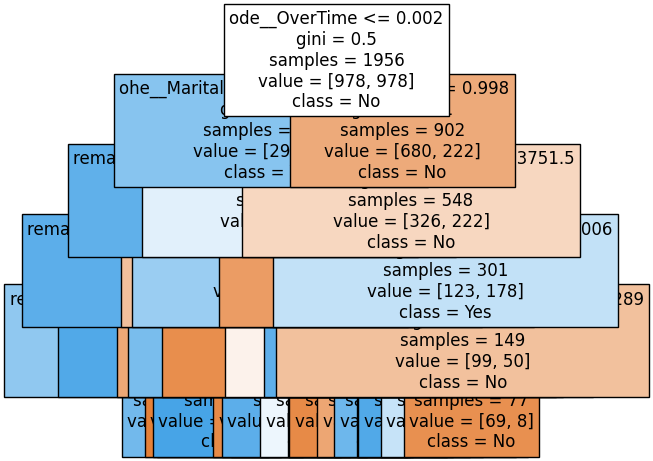

In [ ]:
_ = tree.plot_tree(best_dtc,feature_names=x_train.columns,class_names={0:'No',1:'Yes'},filled=True,fontsize=12)
plt.tight_layout()

In [ ]:
y_train_pre_dtc = best_dtc.predict(x_train)
y_pred_dtc = best_dtc.predict(x_test)

In [ ]:
accuracy_score(y_train, y_train_pre_dtc)

0.8778118609406953

In [ ]:
confusion_matrix(y_train, y_train_pre_dtc)

array([[775, 203],
       [ 36, 942]])

In [ ]:
accuracy_score(y_test,y_pred_dtc)

0.8503401360544217

In [ ]:
confusion_matrix(y_test,y_pred_dtc)

array([[ 17,  22],
       [ 22, 233]])

In [ ]:
df1 = pd.DataFrame(classification_report(y_test, y_pred_dtc,target_names=['Yes','No'], output_dict=True))
df1

,Yes,No,accuracy,macro avg,weighted avg
precision,0.435897,0.913725,0.85034,0.674811,0.85034
recall,0.435897,0.913725,0.85034,0.674811,0.85034
f1-score,0.435897,0.913725,0.85034,0.674811,0.85034
support,39.000000,255.000000,0.85034,294.000000,294.00000


# ***AdaBoostClassifier***

In [ ]:
abc = AdaBoostClassifier(algorithm='SAMME')

In [ ]:
param_grid2 = {
    'n_estimators' : [750,850],
    'learning_rate' : [0.8,1]
}

In [ ]:
grid_search_cv2 = GridSearchCV(abc,param_grid2,cv=kf,scoring='f1')

In [ ]:
grid_search_cv2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': [0.8, 1], 'n_estimators': [750, 850]},
             scoring='f1')

In [ ]:
print(f'best n_estimators = {grid_search_cv2.best_params_["n_estimators"]}')
print(f'best learning_rate = {grid_search_cv2.best_params_["learning_rate"]}')

best n_estimators = 850
best learning_rate = 0.8


In [ ]:
best_abc = grid_search_cv2.best_estimator_

In [ ]:
y_train_pre_abc = best_abc.predict(x_train)
accuracy_score(y_train, y_train_pre_abc)

0.9514314928425358

In [ ]:
y_pre_abc = best_abc.predict(x_test)
accuracy_score(y_test,y_pre_abc)

0.9013605442176871

In [ ]:
confusion_matrix(y_test, y_pre_abc)

array([[ 24,  15],
       [ 14, 241]])

In [ ]:
df2 = pd.DataFrame(classification_report(y_test, y_pre_abc,target_names=['Yes','No'], output_dict=True))
df2

,Yes,No,accuracy,macro avg,weighted avg
precision,0.631579,0.941406,0.901361,0.786493,0.900307
recall,0.615385,0.945098,0.901361,0.780241,0.901361
f1-score,0.623377,0.943249,0.901361,0.783313,0.900817
support,39.000000,255.000000,0.901361,294.000000,294.000000


# ***Random Forest Algorithm***

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42,class_weight='balanced',max_depth=5)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid3 = {
    'n_estimators':[100,200],
    'min_samples_leaf':[5,6],
    'min_samples_split':[20,25]
}

In [ ]:
grid_search_cv3 = GridSearchCV(rf,param_grid3,cv=kf,scoring='f1')

In [ ]:
grid_search_cv3.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=5, n_jobs=-1,
                                              random_state=42),
             param_grid={'min_samples_leaf': [5, 6],
                         'min_samples_split': [20, 25],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:
print(f'best n_estimators = {grid_search_cv3.best_params_["n_estimators"]}')
print(f'min_samples_leaf = {grid_search_cv3.best_params_["min_samples_leaf"]}')
print(f'min_samples_split = {grid_search_cv3.best_params_["min_samples_split"]}')

best n_estimators = 200
min_samples_leaf = 5
min_samples_split = 25


In [ ]:
best_rf = grid_search_cv3.best_estimator_

In [ ]:
y_pre2 = best_rf.predict(x_train)
accuracy_score(y_train, y_pre2)

0.9284253578732107

In [ ]:
y_pre2 = best_rf.predict(x_test)
accuracy_score(y_test, y_pre2)

0.8809523809523809

In [ ]:
confusion_matrix(y_test, y_pre2)

array([[ 15,  24],
       [ 11, 244]])

In [ ]:
df2 = pd.DataFrame(classification_report(y_test, y_pre2,target_names=['Yes','No'], output_dict=True))
df2

,Yes,No,accuracy,macro avg,weighted avg
precision,0.576923,0.910448,0.880952,0.743685,0.866205
recall,0.384615,0.956863,0.880952,0.670739,0.880952
f1-score,0.461538,0.933078,0.880952,0.697308,0.870527
support,39.000000,255.000000,0.880952,294.000000,294.000000
